# Lab 13: Reinforcement Learning (RL)

# TIC-TAC-TOE

## Important method

As the example environments in Gym, the important methods that we need to make it in our own simulator are:
 - *reset*
 - *step*
 - *render*
 - *action_space.n* or *n_action*
 - *legal_action*

Other methods are our define.

Thus, we can understand environments of gym. Now let's try to create your own environment in Tic-tac-toe game by do look-a-like gym class.

## Create abstract environment

At first, create **games** folder for put the game simulators files, then create a python file named **abstract_game.py**. Put the abstract code into the file at below.

You will see the important method which used for all game simulators.

## Let's start to tic-tac-toe

Create another file name **tictactoe.py** (in the **games\\** folder). Create a **Game** class by using the AbstractGame class as a base.

The methods which we can fill in this state are:
 - **init** method: create environment of the game such as board data, and player turn.
 - **to_play** method: return the current player.
 - **reset** method: reset board and player turn.

Afther that, we will add each method step by step.

## get_observation() method

The method release the current state of the game. it is up to user which want to get the game observation structure for training. As normal observation structure for 2 players, it is mostly used as 3 tensors for an observation state.
- Player1 played in the board
- Player2 played in the board
- Current player which needs to play

In [1]:
import numpy as np

In [2]:
    def get_observation(self):
        board_player1 = np.where(self.board == 1, 1, 0)
        board_player2 = np.where(self.board == -1, 1, 0)
        board_to_play = np.full((3, 3), self.player)
        return numpy.array([board_player1, board_player2, board_to_play], dtype="int32")

## legal_actions() method

When playing the game, there are some move that players cannot play. The method needs for check where players cannot play.

In [3]:
def legal_actions(self):
    legal = []
    for i in range(9):
        row = i // 3
        col = i % 3
        if self.board[row, col] == 0:
            legal.append(i)
    return legal

## step() method
The step method lets agent or user input the next action into the board. the method needs to update a new observation state and check whether the game is finished, and calculates the reward.

The reward for board such as tic-tac-toe, connect4, chess will have conditions like:
- The game is not finished: No reward (normally 0)
- The game is finished: Win, draw, lose (normally $[1, 0, -1]$)

Note: **have_winner** method must be used in the method, we will take a look later.

In [4]:
def step(self, action):
    # action is a number 0-8 for declare row and column of position in the board
    row = action // 3
    col = action % 3

    # Check that the action is illegal action, unless the player should loss from illegal action.
    if not (action in self.legal_actions()):
        return self.get_observation(), -1, True

    # input the action of current player into the board
    self.board[row, col] = self.player

    # Check that the game is finished in 2 condition: have a winner, or no any moves left
    have_win = self.have_winner()
    done = have_win or len(self.legal_actions()) == 0

    # If have the winner, the current player should be a winner.
    reward = 1 if have_win else 0

    # change current player
    self.player *= -1

    return self.get_observation(), reward, done

## have_winner() method

This method is used for check the game has winner. In tic-tac-toe, it can win when there are same 3 marks in the same horizontal or vertical, or diagonal.

In [5]:
def have_winner(self):
    # Horizontal and vertical checks
    for i in range(3):
        if (self.board[i, :] == self.player * numpy.ones(3, dtype="int32")).all():
            return True
        if (self.board[:, i] == self.player * numpy.ones(3, dtype="int32")).all():
            return True

    # Diagonal checks
    if (
        self.board[0, 0] == self.player
        and self.board[1, 1] == self.player
        and self.board[2, 2] == self.player
    ):
        return True
    if (
        self.board[2, 0] == self.player
        and self.board[1, 1] == self.player
        and self.board[0, 2] == self.player
    ):
        return True

    return False

## Prototype is done

Ok, now you have your prototype simulator which the code should be look liked this.

Let's try to run your simulator.

In [6]:
import importlib

import os
import numpy

from games.abstract_game import AbstractGame

game_name = 'tictactoe'
game_module = importlib.import_module("games." + game_name) 

env = game_module.Game()

env.reset()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [7]:
env.reset()

next_state, reward, done = env.step(4)
print(next_state, 'reward', reward, 'is_done:', done)

next_state, reward, done = env.step(5)
print(next_state, 'reward', reward, 'is_done:', done)

next_state, reward, done = env.step(1)
print(next_state, 'reward', reward, 'is_done:', done)

next_state, reward, done = env.step(6)
print(next_state, 'reward', reward, 'is_done:', done)

next_state, reward, done = env.step(7)
print(next_state, 'reward', reward, 'is_done:', done)

[[[ 0  0  0]
  [ 0  1  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]] reward 0 is_done: False
[[[0 0 0]
  [0 1 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 1]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]] reward 0 is_done: False
[[[ 0  1  0]
  [ 0  1  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  1]
  [ 0  0  0]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]] reward 0 is_done: False
[[[0 1 0]
  [0 1 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 1]
  [1 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]] reward 0 is_done: False
[[[ 0  1  0]
  [ 0  1  0]
  [ 0  1  0]]

 [[ 0  0  0]
  [ 0  0  1]
  [ 1  0  0]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]] reward 1 is_done: True


## Do more fancier: render() method

Add viewer more beautiful and clearly. Input the method into **render**

In [8]:
env.render()

   | O |   
---+---+---
   | O | X 
---+---+---
 X | O |   


# Temporal Difference (TD)

Temporal Difference (TD) learning is a model-free learning algorithm like MC learning. In MC learning, Q-function is called and updated at the end of the entire episode, but TD learning update Q-function every step of an episode. One of the TD learning algorithm is Q-learning

## Q-Learning

Q-leaning is an off-policy learning algorithm. The Q-function is based on the equation:

$Q(s,a)=Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a')-Q(s,a))$

Where
 - $\alpha$: learning rate
 - $\gamma$: discount factor
 - $\max_{a'}Q(s',a')$: greedy behavior policy, the highest Q-value among those in state $s'$ is selected to generate learning data.

We know from class that Q-learning finds the optimal greedy policy while running an epsilon-greedy policy. 

In [ ]:
# defining epsilon-greedy policy
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q, available_actions):
        probs = torch.ones(n_action) * epsilon / n_action
        # print(probs)
        # print(state)
        # print(Q[state])
        best_action = torch.argmax(Q[state]).item()
        if not(best_action in available_actions):
            best_action = -1
            Q_max = -800000000
            for i in range(n_action):
                if i in available_actions and Q_max < Q[state][i]:
                    Q_max = Q[state][i]
                    best_action = i
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

def q_learning(env, gamma, n_episode, alpha, player):
    """
    Obtain the optimal policy with off-policy Q-learning method
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param n_episode: number of episodes
    @return: the optimal Q-function, and the optimal policy
    """
    n_action = 9
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        if episode % 10000 == 9999:
            print("episode: ", episode + 1)
        state = env.reset()
        state = hash(tuple(state.reshape(-1)))

        is_done = False
        while not is_done:
            if env.to_play() == player:
                available_action = env.legal_actions()
                action = epsilon_greedy_policy(state, Q, available_action)
                next_state, reward, is_done = env.step(action)
                next_state = hash(tuple(next_state.reshape(-1)))
                td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
                Q[state][action] += alpha * td_delta
            else:
                action = env.expert_agent()
                next_state, reward, is_done = env.step(action)
                next_state = hash(tuple(next_state.reshape(-1)))

                if is_done:
                    reward = -reward
                    td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
                    Q[state][action] += alpha * td_delta

            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            if is_done:
                break
            state = next_state

    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
        
    return Q, policy

In [10]:
import importlib
from collections import defaultdict
import torch
import numpy

game_name = 'tictactoe'
game_module = importlib.import_module("games." + game_name)
env = game_module.Game()

env.reset()


gamma = 1
n_episode = 100000
epsilon = 0.1

available_action = env.legal_actions()
epsilon_greedy_policy = gen_epsilon_greedy_policy(9, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

# agent play first
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode, alpha, 1)


print('The optimal policy:\n', optimal_policy)

episode:  10000
episode:  20000
episode:  30000
episode:  40000
episode:  50000
episode:  60000
episode:  70000
episode:  80000
episode:  90000
episode:  100000
The optimal policy:
 {-2317350100305189384: 0, -2587453021701166023: 0, 5280062302396484130: 1, 97283993139794750: 1, 8528004632977412176: 0, 9557454706143703: 3, -7407476519663696002: 0, -7217173294678786774: 4, -9104336549370676228: 0, -1412770562517547518: 0, 6821949351472332741: 1, -7775323665277948169: 0, -809283081383596492: 3, 8573749281795790119: 0, -6287574551374883893: 0, -6416799579967921269: 1, -3862870049348442924: 0, 923698473799271212: 3, 8400132458796109673: 0, 5895630575933384903: 1, -6061120058314047947: 0, -2747943073766455290: 1, -2172794912854481943: 1, 3326271092278628390: 0, -7637972515521498549: 4, -3556921541748092232: 0, 7412166623803178210: 7, -618109835435827677: 0, -7251398204014039591: 6, 256773657030648888: 0, -1120170684372302944: 1, -5590637195248488537: 0, -7298582821099963408: 3, 6880423120041

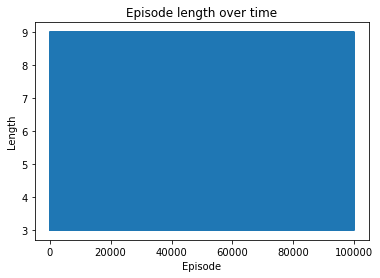

[-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 1, 0, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 0, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


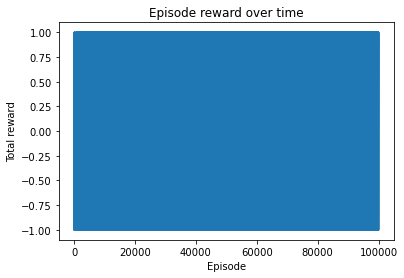

In [11]:
import matplotlib.pyplot as plt

plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()


plt.plot(total_reward_episode)
print(total_reward_episode[-100:])
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

In [12]:
state = env.reset()
state = hash(tuple(state.reshape(-1)))

player = 1
is_done = False
while not is_done:
    if env.to_play() == player:
        available_action = env.legal_actions()
        print("available action:",available_action)
        action = epsilon_greedy_policy(state, optimal_Q, available_action)
        next_state, reward, is_done = env.step(action)
        next_state = hash(tuple(next_state.reshape(-1)))
        print("RL agent")
        print(env.action_to_string(action))
    else:
        action = env.expert_agent()
        next_state, reward, is_done = env.step(action)
        next_state = hash(tuple(next_state.reshape(-1)))
        print("Expert agent")
        print(env.action_to_string(action))

    state = next_state
    env.render()

available action: [0, 1, 2, 3, 4, 5, 6, 7, 8]
RL agent
Play row 1, column 1
 O |   |   
---+---+---
   |   |   
---+---+---
   |   |   
Expert agent
Play row 3, column 1
 O |   |   
---+---+---
   |   |   
---+---+---
 X |   |   
available action: [1, 2, 3, 4, 5, 7, 8]
RL agent
Play row 1, column 2
 O | O |   
---+---+---
   |   |   
---+---+---
 X |   |   
Expert agent
Play row 1, column 3
 O | O | X 
---+---+---
   |   |   
---+---+---
 X |   |   
available action: [3, 4, 5, 7, 8]
RL agent
Play row 2, column 1
 O | O | X 
---+---+---
 O |   |   
---+---+---
 X |   |   
Expert agent
Play row 2, column 2
 O | O | X 
---+---+---
 O | X |   
---+---+---
 X |   |   


## SARSA

In contrast, Q-learning is an off-policy TD learning algorithm, SARSA is an **on-policy TD learning** algorithm.

SARSA (full name: State-Action-Reward-State-Action) looked similar to Q-learning which forcuses on state-action value. The Q-function is:

$Q(s,a)=Q(s,a)+\alpha(r+\gamma Q(s',a')-Q(s,a))$

In stead of using behavior-greedy policy $\max_{a'}Q(s',a')$ like Q-learning, SARSA just select the next action $a'$ following an epsilon-greedy policy to update the Q-value.
However, the action $a'$ must use in the next step (no matter what).

It may not good for 2 players games (What happen if our opponent not play in the same position?)

## SARSA code example

In [28]:
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        print(state)
        print(Q)
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

def sarsa(env, gamma, n_episode, alpha, n_action):
    """
    Obtain the optimal policy with on-policy SARSA algorithm
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param n_episode: number of episodes
    @return: the optimal Q-function, and the optimal policy
    """
#     n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        action = epsilon_greedy_policy(state, Q)
        while not is_done:
            next_state, reward, is_done, info = env.step(action)
            next_action = epsilon_greedy_policy(next_state, Q)
            td_delta = reward + gamma * Q[next_state][next_action] - Q[state][action]
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
            action = next_action
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [29]:
import importlib
from collections import defaultdict
import torch
import numpy

game_name = 'tictactoe'
game_module = importlib.import_module("games." + game_name)
env = game_module.Game()

env.reset()


gamma = 1
n_episode = 100000
epsilon = 0.1

available_action = env.legal_actions()
epsilon_greedy_policy = gen_epsilon_greedy_policy(9, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

# agent play first
optimal_Q, optimal_policy = sarsa(env, gamma, n_episode, alpha, 9)


print('The optimal policy:\n', optimal_policy)

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]]
defaultdict(<function sarsa.<locals>.<lambda> at 0x0000022933C54940>, {})


TypeError: unhashable type: 'numpy.ndarray'

## Experience replay

To improve the performance of Q-learning, we use **experience replay**.

**Experience replay** means we store the agent's experiences during an episode instead of running Q-learning. The learning phase with experience replay becomes two phases: gaining experience and updating models based on the experience obtained after an episode finishes. Specifically, the experience (also called the buffer, or memory) includes the past state, the action taken, the reward received, and the next state for individual steps in an episode.

In the learning phase, a certain number of data points are randomly sampled from the experience and are used to train the learning models. Experience replay can stabilize training by providing a set of samples with low correlation, which, as a result, increases learning efficiency.